In [1]:
import pandas as pd
import numpy as np
rundf = pd.read_csv('results/'+
    'SIsaR_0.9.4.2 experiments 2 seeds-table_1000_basic_control_schoolOnSeptNewControlOct.csv',
                    sep=',',skiprows=6)

In [2]:
rundf["totalInfected"]=rundf["cumulativeRedCount"]+rundf["cumulativeVioletCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]

In [3]:
rundf.columns

Index(['[run number]', '[step]', 'seed0', 'seed', 'cp1cRed', 'cp1cRedNH',
       'cp1cViolet', 'cp1cVioletNH', 'cp1cDead', 'cp2cRed', 'cp2cRedNH',
       'cp2cViolet', 'cp2cVioletNH', 'cp2cDead', 'cp3cRed', 'cp3cRedNH',
       'cp3cViolet', 'cp3cVioletNH', 'cp3cDead', 'cp4cRed', 'cp4cRedNH',
       'cp4cViolet', 'cp4cVioletNH', 'cp4cDead', 'cumulativeRedCount',
       'cumulativeVioletCount', 'cumulativeDeadCount', 'ticks', 'TinfSch',
       'SinfSch', 'TinfNotSch', 'SinfNotSch', 'totalInfected',
       'totalInfected&Deceased'],
      dtype='object')

In [4]:
rundf.replace(-1, np.nan, inplace=True)

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1000 runs with containment measures, school open in Sep, new controls in the second wave

In [6]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,958.00,1000.00,1000.00,1000.00
mean,4.17,165.20,436.90,200.74
std,6.94,178.43,474.08,129.75
min,0.00,0.00,2.00,15.00
25%,0.00,11.00,22.00,91.00
50%,0.00,87.00,226.50,170.50
75%,7.00,297.25,822.50,300.25
max,47.00,756.00,1808.00,960.00


In [7]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [8]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &   ticks \\
\midrule
count &     958.00 &             1000.00 &                 1000.00 & 1000.00 \\
mean  &       4.17 &              165.20 &                  436.90 &  200.74 \\
std   &       6.94 &              178.43 &                  474.08 &  129.75 \\
min   &       0.00 &                0.00 &                    2.00 &   15.00 \\
25\%   &       0.00 &               11.00 &                   22.00 &   91.00 \\
50\%   &       0.00 &               87.00 &                  226.50 &  170.50 \\
75\%   &       7.00 &              297.25 &                  822.50 &  300.25 \\
max   &      47.00 &              756.00 &                 1808.00 &  960.00 \\
\bottomrule
\end{tabular}



The output is included within:  
\begin{table}[htbp] or [H]

... output above ...

\label{a label}  
\caption{a caption}  
\end{table}


## 1 simulation time

array([[<AxesSubplot:title={'center':'ticks'}>]], dtype=object)

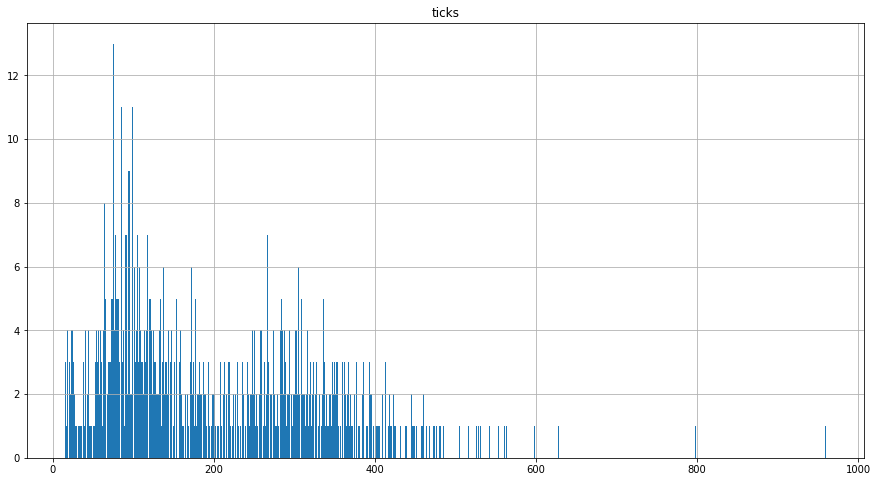

In [9]:
rundf.hist(column="ticks",bins=1000,figsize=(15,8))

## 2 symptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'cumulativeRedCount'}>]],
      dtype=object)

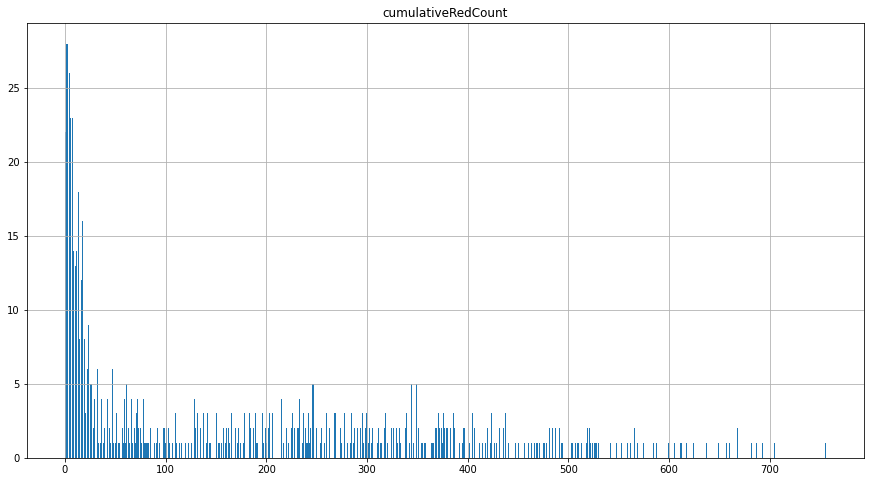

In [10]:
rundf.hist(column="cumulativeRedCount",bins=1000,figsize=(15,8))

## 3 symptomatic agent cumulative count vs. time 

<AxesSubplot:title={'center':'symptomatic agent cumulative count vs. time'}, xlabel='ticks', ylabel='cumulativeRedCount'>

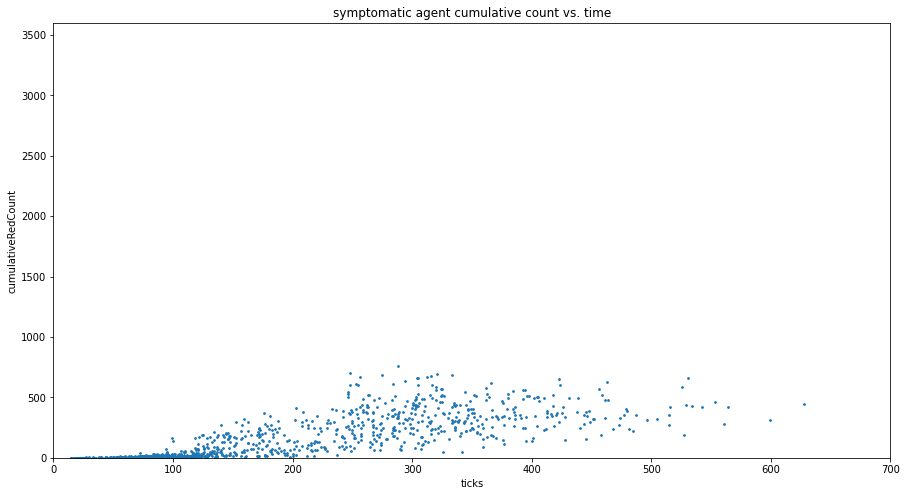

In [11]:
rundf.plot(x="ticks",y="cumulativeRedCount",s=3,kind='scatter',figsize=(15,8), 
           title="symptomatic agent cumulative count vs. time",
           ylim=(0,3600),xlim=(0,700))

## 4 symptomatic + asymptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected'}>]], dtype=object)

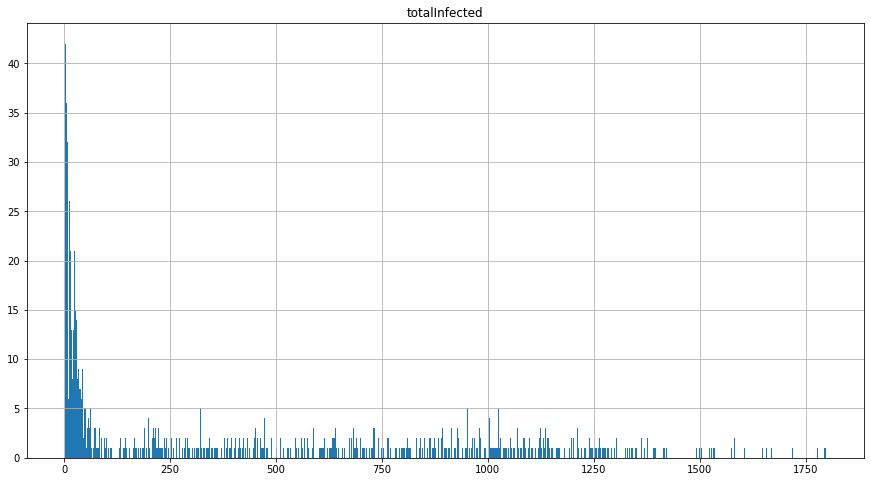

In [12]:
rundf.hist(column="totalInfected",bins=1000,figsize=(15,8))

## 5 total number of deceased

array([[<AxesSubplot:title={'center':'cumulativeDeadCount'}>]],
      dtype=object)

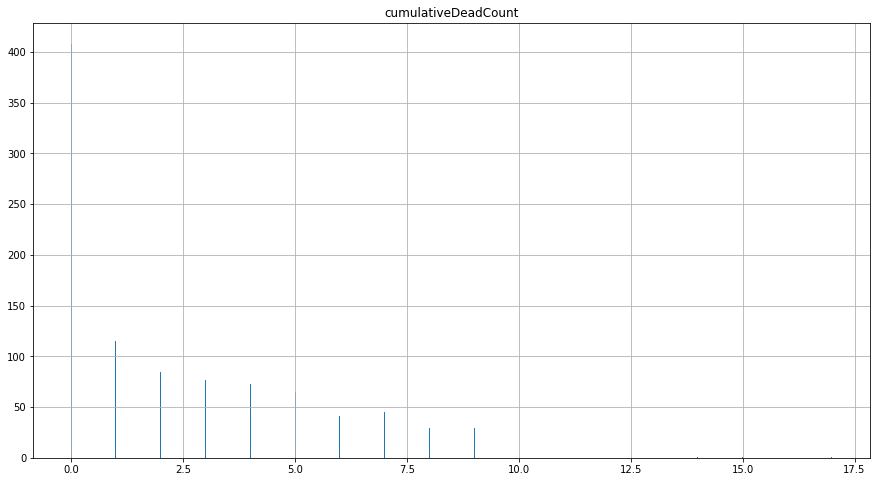

In [13]:
rundf.hist(column="cumulativeDeadCount",bins=1000,figsize=(15,8))

## 6 symptomatic + asymptomatic + deceased agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected&Deceased'}>]],
      dtype=object)

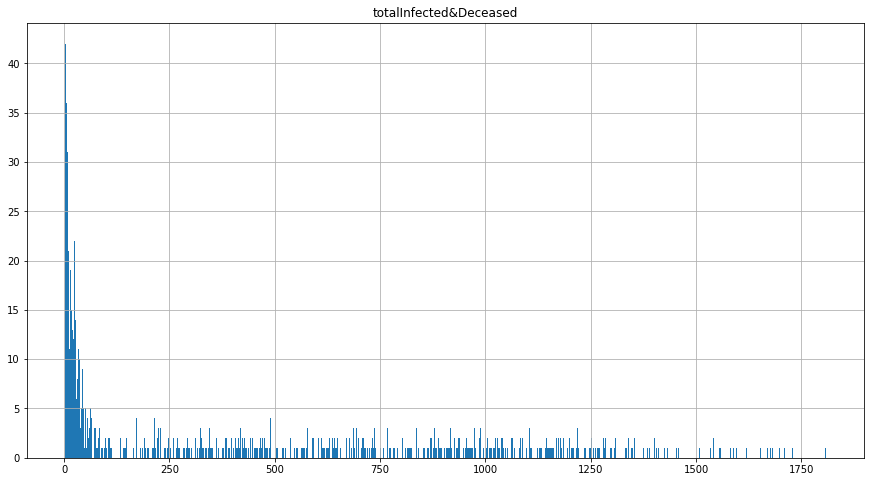

In [14]:
rundf.hist(column="totalInfected&Deceased",bins=1000,figsize=(15,8))

## 7 symptomatic + asymptomatic + deceased agent cumulative count vs. time

<AxesSubplot:title={'center':'simptomatic+asymptomatic+deceased vs. time'}, xlabel='ticks', ylabel='totalInfected&Deceased'>

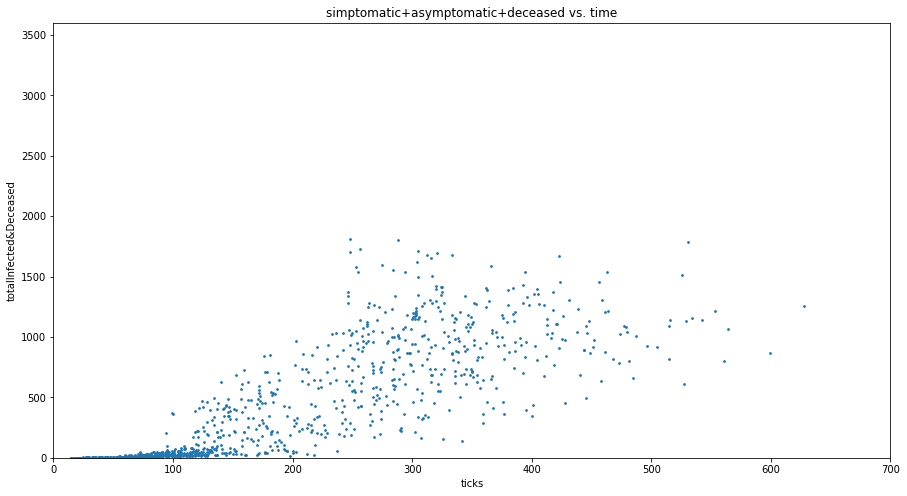

In [15]:
rundf.plot(x="ticks",y="totalInfected&Deceased",s=3,kind='scatter',figsize=(15,8), 
           title="simptomatic+asymptomatic+deceased vs. time",ylim=(0,3600),xlim=(0,700))

# Heatmaps

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm

#import numpy as np
import seaborn as sns; sns.set()

### bins = 10

### symptomatic + asymptomatic + deceases

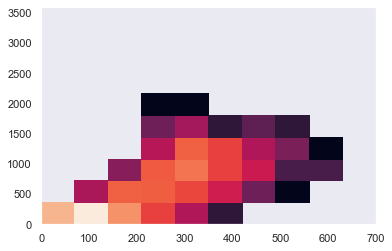

In [17]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [18]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]])

In [19]:
z10=np.amax(hist[0]) # max level z axis
z10

295.0

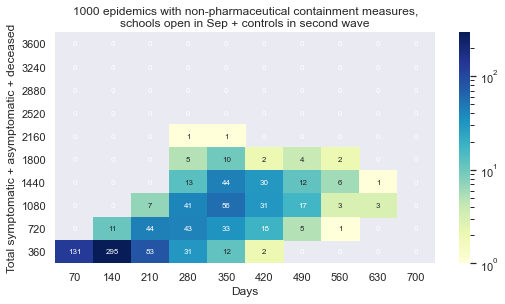

In [20]:
lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave')

plt.show()

### bins = 20

### symptomatic + asymptomatic + deceases

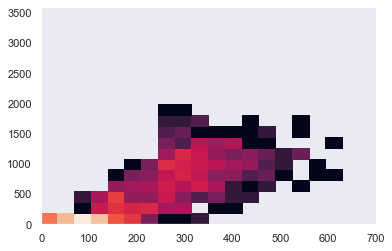

In [21]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [22]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]])

In [23]:
z20=np.amax(hist[0]) # max level z axis
z20

180.0

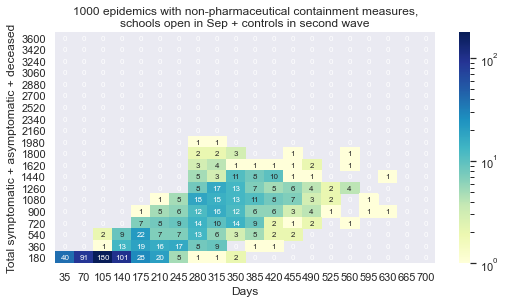

In [24]:
lognorm = LogNorm(vmin=1.0, vmax=z20)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave')

plt.show()

### bins = 30

### symptomatic + asymptomatic + deceases

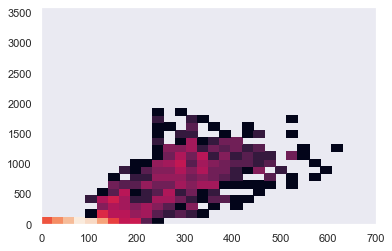

In [25]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [26]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]])

In [27]:
z30=np.amax(hist[0]) # max level z axis
z30

124.0

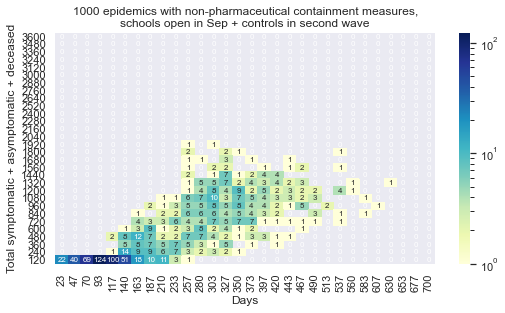

In [28]:
lognorm = LogNorm(vmin=1.0, vmax=z30)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave')

plt.show()

### bins = 60

### symptomatic + asymptomatic + deceases

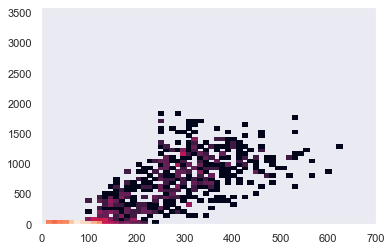

In [29]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [30]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]])

In [31]:
z60=np.amax(hist[0]) # max level z axis
z60

68.0

In [32]:
#firstRow
np.transpose(hist[0])[0]

array([ 0., 22., 18., 22., 24., 45., 68., 56., 52., 36., 26.,  8.,  7.,
        5.,  3.,  4.,  3.,  3.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

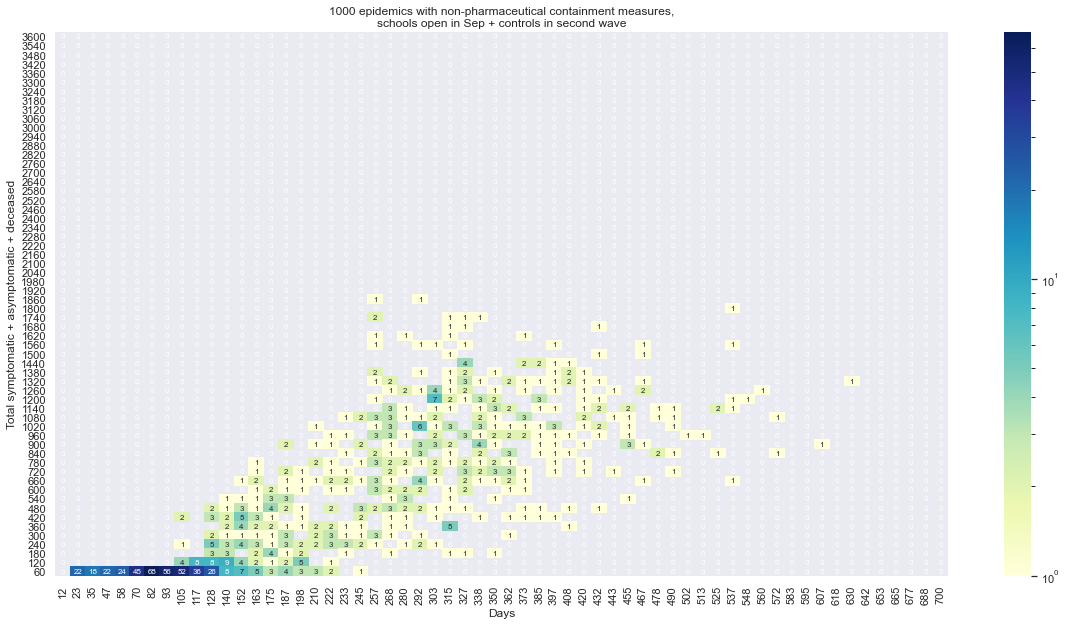

In [33]:
lognorm = LogNorm(vmin=1.0, vmax=z60)
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave')

plt.show()

# Epidemics still active after Sep 14

In [34]:
#area_data=regional_data[regional_data.denominazione_regione==area]
rundf.shape[0] # rows

1000

In [35]:
rundf.ticks.describe() # ticks measures 

count   1000.00
mean     200.74
std      129.75
min       15.00
25%       91.00
50%      170.50
75%      300.25
max      960.00
Name: ticks, dtype: float64

In [36]:
# at 225 we are at Sep 14, opening day of schools
rundf=rundf[rundf.ticks>225]

In [37]:
rundf.shape[0] # rows

405

In [38]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,405.00,405.00,405.00,405.00
mean,5.45,335.22,907.84,335.65
std,7.32,146.91,362.24,84.51
min,0.00,24.00,59.00,226.00
25%,0.00,232.00,656.00,274.00
50%,2.00,331.00,927.00,317.00
75%,10.00,432.00,1151.00,376.00
max,41.00,756.00,1808.00,960.00


In [39]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [40]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &  ticks \\
\midrule
count &     405.00 &              405.00 &                  405.00 & 405.00 \\
mean  &       5.45 &              335.22 &                  907.84 & 335.65 \\
std   &       7.32 &              146.91 &                  362.24 &  84.51 \\
min   &       0.00 &               24.00 &                   59.00 & 226.00 \\
25\%   &       0.00 &              232.00 &                  656.00 & 274.00 \\
50\%   &       2.00 &              331.00 &                  927.00 & 317.00 \\
75\%   &      10.00 &              432.00 &                 1151.00 & 376.00 \\
max   &      41.00 &              756.00 &                 1808.00 & 960.00 \\
\bottomrule
\end{tabular}



### bins = 10

### symptomatic + asymptomatic + deceases

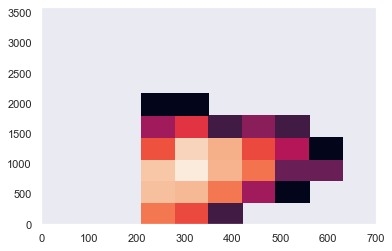

In [41]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [42]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]])

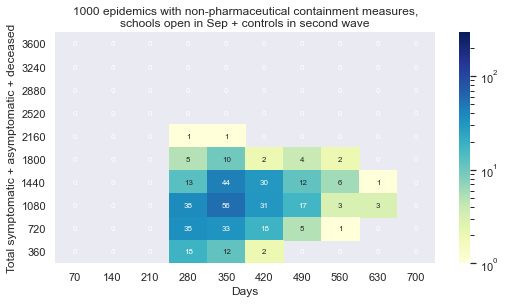

In [43]:
lognorm = LogNorm(vmin=1.0, vmax=z10)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave')

plt.show()

### bins = 20

### symptomatic + asymptomatic + deceases

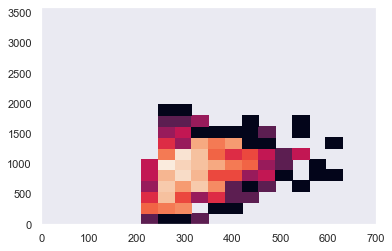

In [44]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [45]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]])

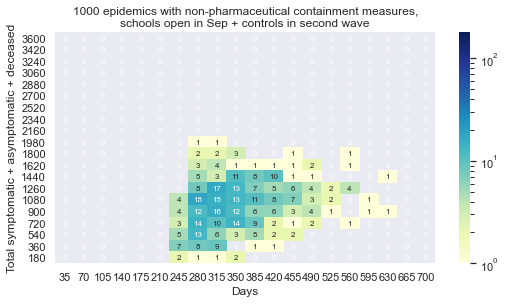

In [46]:
lognorm = LogNorm(vmin=1.0, vmax=z20)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave')

plt.show()

### bins = 30

### symptomatic + asymptomatic + deceases

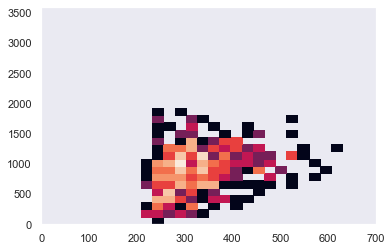

In [47]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [48]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]])

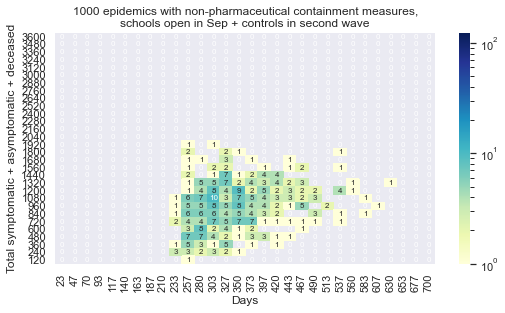

In [49]:
lognorm = LogNorm(vmin=1.0, vmax=z30)
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave')

plt.show()

### bins = 60

### symptomatic + asymptomatic + deceases

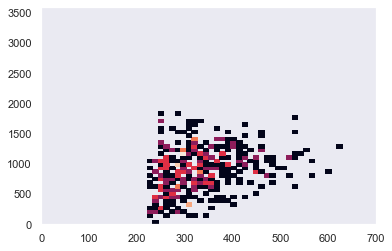

In [50]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [51]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]])

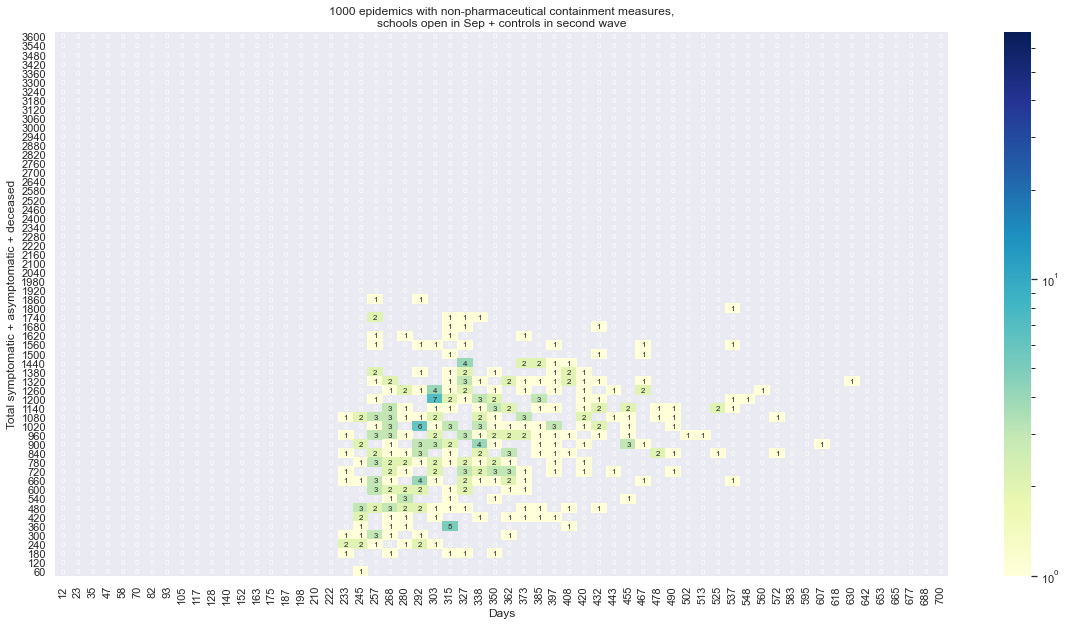

In [52]:
lognorm = LogNorm(vmin=1.0, vmax=z60)
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep + controls in second wave')

plt.show()